In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from itertools import accumulate

In [2]:
intervals = [[1,4],[2,5],[3,4],[4,7],[6,10]]
lengths = [2,1,3,6,3]
n =len(intervals)

In [3]:
diff = [0]*(12)
for interval,l in zip(intervals,lengths):
    start,end = interval
    diff[start] += l
    diff[end+1] -= l

In [4]:
cnt = list(accumulate(diff))

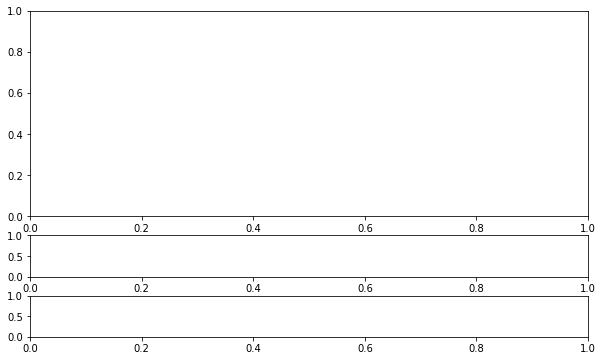

In [5]:
fig,axes = plt.subplots(3,1,gridspec_kw={'height_ratios': [5,1,1]},figsize=(10,6))

In [6]:
def plot_intervals(ax,intervals,lengths):
    boxes = [Rectangle((interval[0], i), interval[1]-interval[0], 1) for i,interval in enumerate(intervals)]
    pc = PatchCollection(boxes, color="",edgecolor='black',linewidths=1.5)
    ax.add_collection(pc)
    ax.margins(0.01)
    ax.set_xticks(np.arange(0,max(i for _,i in intervals)+2))
    ax.set_yticks([])
    ax.set_xlim(-0.5,max(i for _,i in intervals)+1.5)
    for i,interval in enumerate(intervals):
        ax.text((interval[0]+interval[1])/2-0.1, i+0.5, "+"+str(lengths[i]), ha='left', va='center',fontsize=14)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

In [7]:
def plot_array(ax,lst,name,cmap,sign=False):
    if sign:
        texts = []
        for i in lst:
            if i > 0:
                texts.append("+" + str(i))
            elif i<0:
                texts.append(str(i))
            else:
                texts.append("")
        texts = np.array([texts],dtype=str)
        return sns.heatmap([lst],cmap=cmap,cbar=False,xticklabels=np.arange(0,len(lst)),yticklabels=[name],annot=texts,annot_kws={"size":14},fmt="s",center=0,linewidths=0.2,ax=ax)
    else:
        sns.heatmap([lst],cmap=cmap,cbar=False,xticklabels=np.arange(0,len(lst)),yticklabels=[name],annot=True,annot_kws={"size":14},center=0,linewidths=0.2,ax=ax)


In [8]:
plot_intervals(axes[0],intervals,lengths)

In [9]:
plot_array(axes[1],diff,"diff",'RdBu_r',True)
plot_array(axes[2],cnt,"cnt",'PiYG',False)

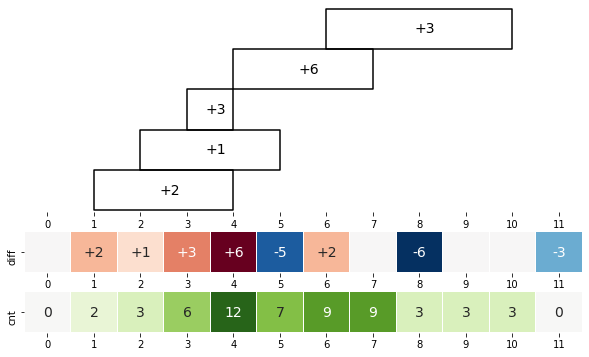

In [10]:
fig

In [11]:
fig.tight_layout()
fig.savefig("../docs/images/diff-array.png",dpi=200)